In [17]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
import random
from numpy import array
import math

In [30]:
def tanh(x, derivative=False):
    if (derivative == True):
        return (1 - (np.tanh(x) ** 2))
    return np.tanh(x)

def relu(x, derivative=False):
    if (derivative == True):
        return 1. * (x > 0)
    return x * (x > 0)

def sigmoid(x, derivative=False):
    sigm = 1. / (1. + np.exp(-x))
    if derivative:
        return sigm * (1. - sigm)
    return sigm
    
def activation_function(x, derivative=False):
    return relu(x, derivative)

In [31]:
class NeuralNetwork:
    
    def __init__(self, neuron_list):
        self.layer_count = len(neuron_list)
        self.neuron_list = neuron_list
        #self.biases = [np.random.randn(y, 1) for y in neuron_list[1:]]
        self.weights = [np.random.randn(y, x) for x, y in zip(neuron_list[:-1], neuron_list[1:])] 
        self.biases = [np.zeros((y, 1), dtype=float) for y in neuron_list[1:]]
        #self.weights = [np.full((y, x),1,dtype=float) for x, y in zip(neuron_list[:-1], neuron_list[1:])] 
        self.activations = [np.zeros((x)) for x in neuron_list]
        self.deltas = [np.zeros((x)) for x in neuron_list]
        self.learning_rate = 0.01
        
    def forward_propogation(self, x):
        self.activations[0] = x      
        for i in range(self.layer_count-1):
            self.activations[i+1] = activation_function(np.dot(self.weights[i], self.activations[i])+self.biases[i])
        return self.activations[-1]
    
    def compute_deltas(self,output_labels):
        # Compute last layers' activations
        for i in range(self.neuron_list[-1]):
            self.deltas[-1][i] = 2*activation_function(self.activations[-1][i],True)*(output_labels[i]-activation_function(self.activations[-1][i]))            
        
        # Compute all deltas in all layers
        # l is layer starting from L-1, ending at 1
        for l in range(self.layer_count-2, 0, -1):
            # i is representing neuron count in the layer l
            for i in range(len(self.activations[l])):
                # j is representing next layer's neurons
                for j in range(len(self.activations[l+1])):
                    self.deltas[l][i] = self.deltas[l+1][j]*self.weights[l][j][i]*activation_function(self.activations[l][i],True)
                 
    def back_propogation(self, output_labels):
        # Compute deltas
        self.compute_deltas(output_labels)
        # Update weights 
        # l is layer starting from L-1, ending at 1
        for l in range(0,self.layer_count-1):
            # i is representing neuron count in the layer l
            for i in range(len(self.activations[l])):
                # j is representing next layer's neurons
                for j in range(len(self.activations[l+1])):
                    self.weights[l][j][i] += self.learning_rate*self.deltas[l+1][j]*self.activations[l][i]

                 
    def train(self, x, y):
        error = []
        for i in range(len(x)):
            #print(self.weights)
            print("Epoch: " + str(i))
            estimation = self.forward_propogation(x[i])
            #print("Inp: " + str(np.transpose(x[i])) + "\nEst: " + str(np.transpose(estimation)) + "\n")
            error.append(np.sum((estimation - y[i])**2))
            self.back_propogation(y[i])
            print(self.weights)
        return error          

Epoch: 0
[array([[ 0.61435723,  0.23058637,  0.54696207,  1.56028579],
       [-0.23832185,  0.11286589, -0.70121386, -0.07172657]]), array([[-0.13303061, -1.56337417],
       [-0.46019554, -1.38936851],
       [ 0.13345884,  1.52303796],
       [ 0.46778307,  0.71647186]])]
Epoch: 1
[array([[ 0.61450023,  0.23401529,  0.55162863,  1.56895518],
       [-0.23832185,  0.11286589, -0.70121386, -0.07172657]]), array([[-0.13303061, -1.56337417],
       [-0.46019554, -1.38936851],
       [ 0.2516964 ,  1.52303796],
       [ 0.50403426,  0.71647186]])]
Epoch: 2
[array([[ 0.6090438 ,  0.23141949,  0.5497615 ,  1.56644741],
       [-0.23832185,  0.11286589, -0.70121386, -0.07172657]]), array([[-0.13303061, -1.56337417],
       [-0.46019554, -1.38936851],
       [ 0.24832301,  1.52303796],
       [ 0.48632715,  0.71647186]])]
Epoch: 3
[array([[ 0.60239966,  0.22716432,  0.54325165,  1.56305217],
       [-0.23832185,  0.11286589, -0.70121386, -0.07172657]]), array([[-0.13303061, -1.56337417],
   

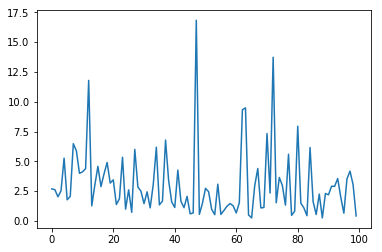

In [33]:
np.set_printoptions(suppress=True)
neuron_list = [4,2,4]
nn = NeuralNetwork(neuron_list)
# Give input in nx1 dimension
inp = []
for i in range(100):
    inp.append(np.transpose([abs(np.random.normal(0, 1, 4))]))
plt.plot(nn.train(inp,inp))

In [34]:
'''
neuron_list = [2,2,2]
nn = NeuralNetwork(neuron_list)
# Give input in nx1 dimension
inp = np.transpose([[4,5]])
nn.forward_propogation(inp)
out = np.transpose([[4,5]])
nn.back_propogation(out)
print(nn.deltas)
'''

'\nneuron_list = [2,2,2]\nnn = NeuralNetwork(neuron_list)\n# Give input in nx1 dimension\ninp = np.transpose([[4,5]])\nnn.forward_propogation(inp)\nout = np.transpose([[4,5]])\nnn.back_propogation(out)\nprint(nn.deltas)\n'

In [ ]:
'''
neuron_list = [8,4,4,8]
nn = NeuralNetwork(neuron_list)
# Give input in nx1 dimension
inp = np.transpose([[4,5,6,7,8,9,10,11]])
nn.forward_propogation(inp)
out = np.transpose([[4,5,6,7,8,9,10,11]])
nn.compute_deltas(out)
nn.back_propogation(out)
print(nn.deltas)
'''